# Introduction to Deep Learning with Lasagne

## Before starting, a review of concepts ..
### Supervised Learning

The most common form of * machine learning *, whether deep or not, is supervised learning.
If we want to build a classifier based on images, we will collect the data and associate a label with each image. In training stage, an image is shown to the classifier and it generates an output in the form of a vector with *scores*, one for each category. The idea is that the desired category has the *highest* score possible.

![knobs](../images/workflow.png "workflow")

Image from [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

During training we calculate a function that measures the error or distance between the *scores* generated by our classifier and the real values. With the result of this function, the classifier modifies its parameters to reduce this error. These parameters, usually called weights, can be seen as "knobs" that define the input-output function of our classifier.


![knobs](../images/knobs.jpg "knobs")


## Neural Nets

Now, let's think about a problem, where we have access to labeled data in the form $ (x_i, y_i) $. The neural networks allow us to define nonlinear and complex hypotheses of the form $ h_ {W, b} (x) $, where $ W, b $ are the parameters that we can adapt to our data $ (x_i, y_i) $.

![knobs](../images/rn.png "rn")

Consider a neural network with $N$ layers, the input and output layers are represented respectively as $ X_0 $ and $ X_N $, where the vector $ X_n-1 $ is the input layer of $ n $ $ n = 1, \cdots, N $).
If $ W_n $ is the weight matrix and $ b_n $ is the bias vector, the output of the layer $ X_n $ can be represented as follows:

$X_n = f(W_{n}X_{n-1} + b_n)$

Where $ f $ is the activation function.

![activation](../images/activation.png "activation cheatsheet https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network")
Image from [https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network](https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network)

To adjust weights, the learning algorithm computes the vector gradient for each weight, indicating by how much the error would increase or decrease after the weight is increased by a small amount. Then the weight vector is updated in the opposite direction to the gradient.

The ** objective function**, averaged over all the training elements, can be seen as a mountainous landscape. A negative gradient vector points to the next lower part of the terrain, thus taking us to the lowest possible error. 

In [20]:
from lasagne import objectives
[x for x in dir(objectives) if '__' not in x]

['aggregate',
 'align_targets',
 'as_theano_expression',
 'binary_accuracy',
 'binary_crossentropy',
 'binary_hinge_loss',
 'categorical_accuracy',
 'categorical_crossentropy',
 'multiclass_hinge_loss',
 'squared_error',
 'theano']

In [21]:
from lasagne import nonlinearities
[x for x in dir(nonlinearities) if '__' not in x]

['LeakyRectify',
 'SELU',
 'ScaledTanH',
 'ScaledTanh',
 'elu',
 'identity',
 'leaky_rectify',
 'linear',
 'rectify',
 'selu',
 'sigmoid',
 'softmax',
 'softplus',
 'tanh',
 'theano',
 'very_leaky_rectify']

To take this search for the minimum error to practice we use **Stochastic Gradient Descent**, it consists of showing the input vectors of a subset of training data, compute the outputs, their errors, calculate the gradient for those examples and adjust the weights accordingly. This process is repeated over several subsets of examples until the objective function average stops decreasing.

Given a recognition problem, the training task is about finding a set of optimal parameters $\{W_{n}, b_{n}\}$ which minimize the classification error.
To determine how these parameters should be modified to reduce the error, a **gradient descent** algorithm is commonly used.

The Error prediction is denoted as $e(X_{N}, X_{true})$. The gradient of $e(X_{N}, X_{true})$ is calculated by taking into account the parameters of the model $\{W_{n}, b_{n}\}$.
The values of each layer are updated by taking small steps:

$W_{n} \gets W_{n} - \eta  \frac{\partial e(X_{N}, X_{true})}{\partial W_{n}}$

$b_{n} \gets b_{n} - \eta  \frac{\partial e(X_{N}, X_{true})}{\partial b_{n}}$

Where, $\eta$ is the *learning rate*, a hyperparameter that controls the size of the step toward convergence.

A good practice is to work with a $\eta$ that decreases linearly as the *epochs* advanced, while *momentum* increased.

![alt text](../images/saddle_point_evaluation_optimizers.gif "gif de http://sebastianruder.com/optimizing-gradient-descent/")
Plot from http://sebastianruder.com/optimizing-gradient-descent/

In [22]:
from lasagne import updates
[x for x in dir(updates) if '__' not in x]

['OrderedDict',
 'T',
 'adadelta',
 'adagrad',
 'adam',
 'adamax',
 'apply_momentum',
 'apply_nesterov_momentum',
 'get_or_compute_grads',
 'momentum',
 'nesterov_momentum',
 'norm_constraint',
 'np',
 'rmsprop',
 'sgd',
 'theano',
 'total_norm_constraint',
 'utils']

![alt text](../images/deeplearning.jpg "dl")

### But ... What is Deep Learning ?

Deep learning allows computational models composed of several layers of processing to learn representations about data with multiple levels of abstraction and, through this, to discover precise representations in large volumes of data autonomously.

In particular, Convolutional Neural Networks (ConvNets) constitute the state of the art of several computational vision problems, given their great classification performance in large volumes of images. Its great performance is based on four basic ideas: local connections, shared weights, pooling and the use of several layers.

![alt text](../images/capas_de_abstracci.png "structure")


### ConvNets
![alt text](../images/convnets.jpg "structure from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

A classical ConvNet architecture consists of two stages. The first, focuses on **extracting discriminant characteristics** at different levels of abstraction, and the second,  on **classification** from the features previously obtained. The first instance is built from two types of layers: convolution and *pooling*.

<!---Las arquitecturas de ConvNets asumen que los datos con los que se trabajara son arreglos multidimensionales, gracias a esta suposición varias cualidades de los datos se pueden embeber en la arquitectura de la red. A diferencia de las redes neuronales convencionales, las *ConvNets* cuentan con unidades organizadas en tres dimensiones: ancho, alto y profundidad. --->

![alt text](../images/cnn.jpg "structure from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

Image from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/




### Types of Layers

In [16]:
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify, sigmoid

#### Dense Layers

All hidden units are connected to all input units

In [5]:
(DenseLayer, {'num_units': 256, 'nonlinearity': rectify})

(lasagne.layers.dense.DenseLayer,
 {'nonlinearity': <function lasagne.nonlinearities.rectify>, 'num_units': 256})

#### Conv Layers

In the convolution layers, the units are organized in *feature maps*, in which each unit
is connected to local *patches* of the *feature maps* belonging to the previous layer through a set of weights, called *filter bank*. All units within a *feature map* share the same *filter bank*, different *feature maps* within the same layer use different *filter banks*, the arrangement of these has two justifications, on the one hand, data in form of arrays, as in our case, images, local subsets tend to be highly correlated and on the other hand the local statistics of images are invariant to their location.

![alt text](../images/Convolution_schematic.gif "gif de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

Image from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/


In [6]:
(Conv2DLayer, {'num_filters': 32, 'filter_size': 2})

(lasagne.layers.conv.Conv2DLayer, {'filter_size': 2, 'num_filters': 32})

#### Max Pooling

To reduce the dimensionality of *feature maps*, a pooling layer is located between the convolution layers. The pooling layers eliminate the non-maximum values by calculating an aggregation function, usually using maximum or average on small input regions. The main goal of these layers is to reduce the computational cost in subsequent layers by reducing the size of future feature maps and providing a form of translational invariance.


![alt text](../images/maxpool.jpg " imagen de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

Image from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/

In [7]:
(MaxPool2DLayer, {'pool_size': 2})

(lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2})


#### Dropout

Dropout is a technique that prevents a network from overfitting and provides a way to efficiently combine several neural network architectures together. The term dropout refers to discarding units and their connections (whether in hidden layers or not) in a neural network, this disposal is only temporary. The way this is performed is random, each unit is associated with a probability value $p$ independent of the rest between $[0, 1]$.
<img src="../images/clasica_drop.png" width="400">


### Other interesting types of layers in Lasagne

- Transformer Layer (http://papers.nips.cc/paper/5854-spatial-transformer-networks.pdf)
- Expression Layer
- Standardize Layer


http://lasagne.readthedocs.io/en/latest/modules/layers/special.html

In [8]:
(DropoutLayer, {'p': 0.5})

(lasagne.layers.noise.DropoutLayer, {'p': 0.5})

## Lasagne


In [9]:
from IPython.display import IFrame
IFrame('http://lasagne.readthedocs.io/en/latest/', width=900, height=350)

#  Let's classify the type of ship that appears in the image!

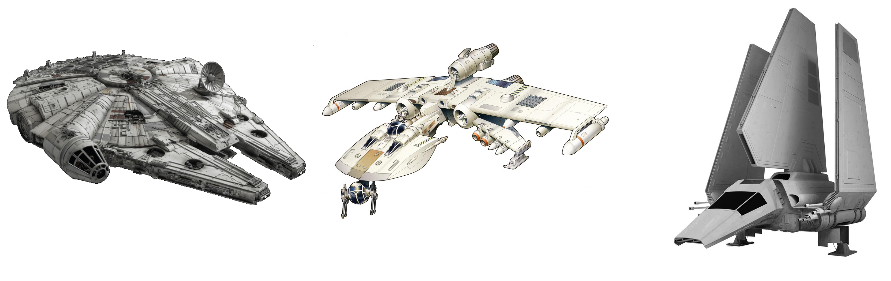

In [10]:
from IPython.display import Image
Image(filename='../images/ships.png') 

## How does our input data looks like?
![alt text](../images/dataset.png)

## Loading our images to a Pandas Dataframe

In [10]:
import os
import pandas as pd
import cv2

In [11]:
def images_to_file(path_to_photos):
    """
    Load images from folder and create a csv file with 
    X = pixel array and y = type of ship
    """
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc'], index=ids)
    for image_file in os.listdir(path_to_photos):
            image = cv2.imread(os.path.join(path_to_photos, image_file), 0)
            df_out['Image'][os.path.splitext(image_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(image_file)[0]] = image_file.split('_')[0]
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print(catenc)
    df_out.to_csv('../star_wars_data.csv')
    
    return df_out

In [13]:
images_to_file("../data/all/")

(array([0, 1, 1, ..., 0, 0, 1]), Index(['falcon', 'lambda', 'kwing'], dtype='object'))


,Image,Model,Model_enc
falcon_165,135 94 30 14 3 7 2 7 5 7 6 4 6 5 20 58 58 20 2...,falcon,0
lambda_000163,123 127 123 117 119 123 128 134 136 131 125 12...,lambda,1
lambda_000164,119 117 117 120 125 129 130 130 129 132 135 13...,lambda,1
lambda_052,107 108 107 105 104 103 102 100 140 158 157 15...,lambda,1
kwing_00098,0 13 43 83 104 111 124 132 138 138 130 113 101...,kwing,2
kwing_000224,7 23 29 9 8 12 16 20 8 29 40 24 30 38 41 43 41...,kwing,2
kwing_000121,27 18 16 17 8 0 1 7 21 23 21 7 2 2 33 68 53 53...,kwing,2
lambda_092,170 174 176 176 178 182 183 181 181 180 177 17...,lambda,1
falcon__154,19 21 24 25 28 31 32 32 29 44 37 20 21 50 72 8...,falcon,0
lambda_0108,126 129 130 127 126 127 129 130 129 130 130 12...,lambda,1


### How does the file we generate look like?

In [ ]:
!head ../star_wars_data.csv

### Now to format the input data for our network ...

In [12]:
import numpy as np
from sklearn.utils import shuffle

In [14]:
def load(images_dir="../data/all/", star_wars_fn='../star_wars_data.csv'):
    """
    Load images and target class for Falcon,
    Lambda and K-wing ships.
    """
    
    if os.path.exists(star_wars_fn):
        df = pd.read_csv(star_wars_fn)
    else:
        df = images_to_file(images_dir)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.
    X = X.astype(np.float32)

    y = df['Model_enc'].values
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.int32)
    
    return X, y

### What do we need to build our net ?

In [5]:
import warnings; warnings.simplefilter('ignore')
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

Using gpu device 0: GeForce GTX 860M (CNMeM is disabled, CuDNN not available)


### How can we define the architecture of our network?

In [6]:
layers_0 = [
    # layer dealing with the input data
    (InputLayer, {'shape': (None, 1, 128, 128)}),

    # first stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 5}),
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 3}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # second stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 32, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 32, 'filter_size': 3}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # two dense layers with dropout
    (DenseLayer, {'num_units': 64}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 64}),

    # the output layer
    (DenseLayer, {'num_units': 3,
     'nonlinearity': lasagne.nonlinearities.softmax}),
]

In [97]:
layers_1 = [
    # layer dealing with the input data
    (InputLayer, {'shape': (None, 1, 128, 128)}),
    
    # first stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 8, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # second stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 8, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # third stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 8, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # third stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # two dense layers with dropout
    (DenseLayer, {'num_units': 64}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 64}),
    
    # the output layer
    (DenseLayer, {'num_units': 3, 
     'nonlinearity': lasagne.nonlinearities.softmax}),
]

In [101]:
def create_net(max_epochs=100):
    return NeuralNet(
        layers=layers_1,
        update=nesterov_momentum,
        update_learning_rate=0.01,
        regression=False,
        objective_loss_function=categorical_crossentropy,
        # batch_iterator_train=RotationBatchIterator(batch_size=256),
        # on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        # ],
        max_epochs=max_epochs,
        verbose=1)

### Some Hyperparameter Tuning

Some things that you want to tune:
 - Net structure
 - learning rate
 - W initialization
 - Regularization
 

![alt text](../images/split.png "http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")
Image from [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

[Practical Recommendations for Gradient-Based Training of Deep Architectures - Yoshua Bengio](https://arxiv.org/pdf/1206.5533v2.pdf)

In [65]:
from sklearn.cross_validation import train_test_split
x, y = load("../data/all")
x = x.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)

(3003, 1, 128, 128)


In [102]:
net = create_net(30)
net.fit(X_train, y_train)

# Neural Network with 43699 learnable parameters

## Layer information

  #  name        size
---  ----------  ---------
  0  input0      1x128x128
  1  conv2d1     8x126x126
  2  maxpool2d2  8x63x63
  3  conv2d3     8x61x61
  4  maxpool2d4  8x30x30
  5  conv2d5     8x28x28
  6  maxpool2d6  8x14x14
  7  conv2d7     16x12x12
  8  maxpool2d8  16x6x6
  9  dense9      64
 10  dropout10   64
 11  dense11     64
 12  dense12     3

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     1.09767     1.09285    1.00441      0.38870  2.84s
      2     1.09109     1.08555    1.00511      0.42359  2.82s
      3     1.08188     1.07188    1.00933      0.50166  2.83s
      4     1.06148     1.03824    1.02239      0.56312  2.83s
      5     1.00708     0.94412    1.06668      0.61130  2.83s
      6     0.90883     0.80166    1.13369      0.64784  2.83s
      7     0.79683     0.70076    1.13709      0.68771  2.85s
     

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7ff1086a92b0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7ff1086a9278>,
     check_input=True, custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 128, 128)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'num_filters': 8, 'filter_size': 3, 'W': <lasagne.init.GlorotUniform object at 0x7ff0ddccbc50>}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, {'pool_size': 2}), (<clas....layers.dense.DenseLayer'>, {'num_units': 3, 'nonlinearity': <function softmax at 0x7ff1091e2c80>})],
     loss=None, max_epochs=30, more_params={},
     objective=<function objective at 0x7ff10812aa60>,
     objective_loss_function=<function categorical_crossentropy at 0x7ff1088e9d08>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x7ff0df29d400>],
     on_training_finished=[],
     on_tr

## How can we test our net?

In [103]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [104]:
print(classification_report(y_test, net.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       371
          1       0.98      0.98      0.98       483
          2       0.98      0.98      0.98       434

avg / total       0.98      0.98      0.98      1288



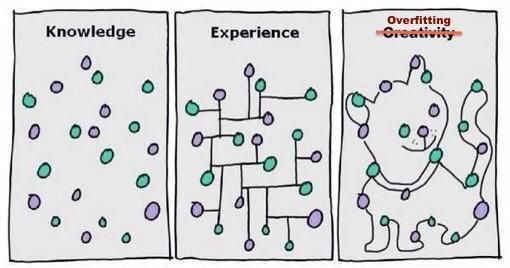

In [36]:
from IPython.display import Image
Image(filename='../images/overfitting.jpg') 

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Taking a look at our *learning rate*
![alt text](../images/lr.png "http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")
Image from [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

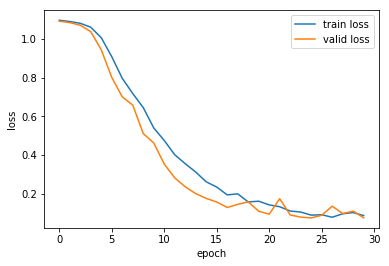

In [105]:
%matplotlib inline
visualize.plot_loss(net)

### How did our trained network do while classifying new ships?


![alt text](../images/confusion_matrix.png)

In [106]:
def plot_matrix(clf, X_test, y_test):
    """
    Plot Confussion Matrix from a given classifier
    """
   
    plt.clf()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    print(cm_normalized)
    plt.tick_params(labelsize=20)

    ax = plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    cb = plt.colorbar()
    cb.ax.tick_params(axis='both', labelsize=20)
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.xticks(range(3),range(3))
    plt.yticks(range(3),range(3))



Normalized confusion matrix
[[ 0.98113208  0.00808625  0.01078167]
 [ 0.01242236  0.97929607  0.00828157]
 [ 0.00691244  0.01152074  0.98156682]]
[[364   3   4]
 [  6 473   4]
 [  3   5 426]]


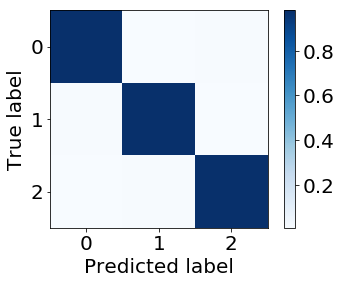

In [107]:
plot_matrix(net, X_test, y_test)
print(confusion_matrix(y_test, net.predict(X_test)))

In [ ]:
from scipy import ndimage


class RotationBatchIterator(BatchIterator):

    def transform(self, xb, yb):
        angle = np.random.choice([-20, 20])
        xb, yb = super(RotationBatchIterator, self).transform(xb, yb)

        bs = xb.shape[0]
        indices = np.random.choice(bs, int(bs / 4), replace=False)

        # xb[indices] = xb[indices, :, :, ::-1]
        for ind in indices:
            rotated_image = ndimage.rotate(xb[ind].reshape(128, 128),
                           -angle, reshape=False).astype(np.float32)
            xb[ind] = rotated_image.reshape((1, 128, 128))

        return xb, yb


In [ ]:
class AdjustVariable(object):
    def __init__(self, name, start=0.03, stop=0.001):
        self.name = name
        self.start, self.stop = start, stop
        self.ls = None

    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls = np.linspace(self.start, self.stop, nn.max_epochs)

        epoch = train_history[-1]['epoch']
        new_value = np.float32(self.ls[epoch - 1])
        getattr(nn, self.name).set_value(new_value)

### Do I have to train my network every time I want to use it ??
![alt text](../images/pickle.jpg)

In [45]:
import pickle

In [46]:
with open('../data/ship_classifier.pickle', 'wb') as f:
        pickle.dump(net, f, -1)

In [47]:
net = None
with open('../data/ship_classifier.pickle', 'rb') as f:
       net = pickle.load(f)

In [48]:
from nolearn.lasagne import PrintLayerInfo
layer_info = PrintLayerInfo()

net.verbose = 1
net.initialize()
layer_info(net)

# Neural Network with 465883 learnable parameters

## Layer information

  #  name        size
---  ----------  ---------
  0  input0      1x128x128
  1  conv2d1     8x126x126
  2  maxpool2d2  8x63x63
  3  conv2d3     8x61x61
  4  maxpool2d4  8x30x30
  5  dense5      64
  6  dropout6    64
  7  dense7      64
  8  dense8      3



### What happens inside the network?

In [49]:
net.layers

[(lasagne.layers.input.InputLayer, {'shape': (None, 1, 128, 128)}),
 (lasagne.layers.conv.Conv2DLayer,
  {'W': <lasagne.init.GlorotUniform at 0x7ff0ad66cd68>,
   'filter_size': 3,
   'num_filters': 8}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.conv.Conv2DLayer,
  {'W': <lasagne.init.GlorotUniform at 0x7ff09d6906d8>,
   'filter_size': 3,
   'num_filters': 8}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.dense.DenseLayer, {'num_units': 64}),
 (lasagne.layers.noise.DropoutLayer, {}),
 (lasagne.layers.dense.DenseLayer, {'num_units': 64}),
 (lasagne.layers.dense.DenseLayer,
  {'nonlinearity': <function lasagne.nonlinearities.softmax>, 'num_units': 3})]

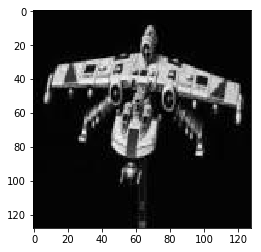

In [50]:
%matplotlib inline

my_image = cv2.imread("../data/kwing.jpg", 0)
plt.imshow(my_image, cmap='gray')
X = np.vstack(my_image) / 255.
plt.imshow(X, cmap='gray')
X = X.astype(np.float32)
X = X.reshape(-1, 1, 128, 128)

In [108]:
net.predict(X)

array([2])

### How sure is my network that I identify?

In [109]:
proba = net.predict_proba(X)
proba, proba.sum()

(array([[  1.56320278e-02,   3.59529913e-05,   9.84332085e-01]], dtype=float32),
 1.0000001)

In [110]:
proba[0, np.argmax(proba)]

0.98433208

#### What happens if we cover parts of our image? Which parts are important for classification?

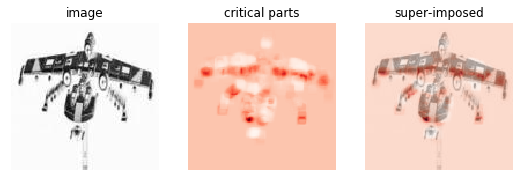

In [111]:
h = visualize.plot_occlusion(net, X, [2])

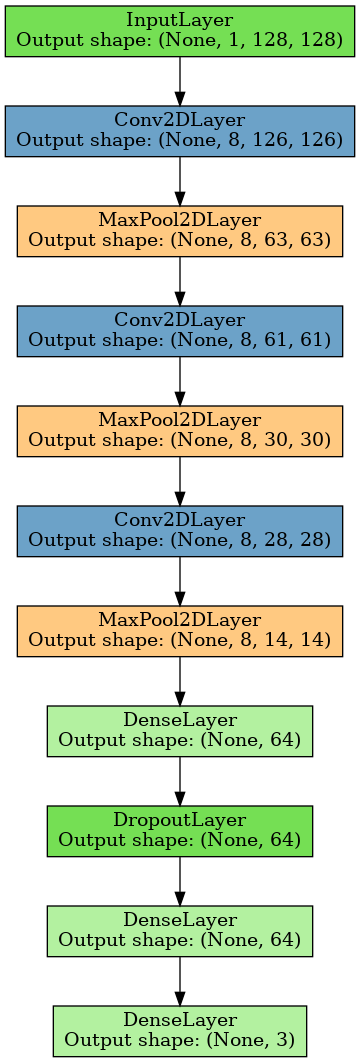

In [73]:
from nolearn.lasagne.visualize import draw_to_notebook

draw_to_notebook(net)

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

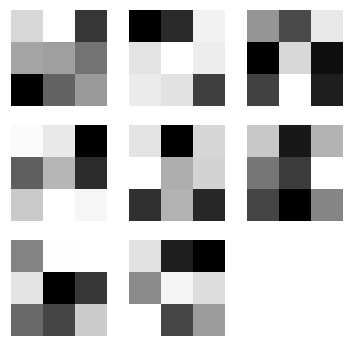

In [112]:
visualize.plot_conv_weights(net.layers_[1])

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

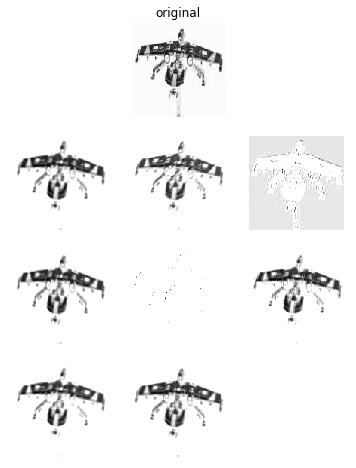

In [113]:
visualize.plot_conv_activity(net.layers_['conv2d1'], X)

### Now let's use our network to classify from video !!

In [76]:
tipos_naves = {0: 'Falcon', 1: 'Lambda', 2: 'K-wing'}

def format_net(my_image):
        X = np.vstack(my_image) / 255.
        X = X.astype(np.float32)
        X = X.reshape(-1, 1, 128, 128)
        
        return X

### Showing the result frame by frame ..

In [77]:
import time
import cv2

def classifier_over_video(file_name=1):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128),
                         interpolation=cv2.INTER_CUBIC)
        X = format_net(res)
        
        pred = tipos_naves[net.predict(X)[0]]
        proba = net.predict_proba(X)
        proba = str(proba[0, np.argmax(proba)])
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, pred, (10, 500),
                    font, 4, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(frame, proba, (10, 800),
                    font, 4, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
    cap.release()
    cv2.destroyAllWindows()

In [117]:
classifier_over_video("../data/videos_demo/tomados.mp4")

#### With a little trick we can have a more stable labeling on the video ...

In [84]:
import time
import cv2
from collections import Counter

def classifier_over_video_most_common(file_name):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    clase = []
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128),
                         interpolation=cv2.INTER_CUBIC)
        X = format_net(res)
        clase.append(net.predict(X)[0])
        font = cv2.FONT_HERSHEY_SIMPLEX
        mi_nave_frecuente = Counter(clase).most_common(1)[0][0]
        cv2.putText(frame, tipos_naves[mi_nave_frecuente], (10, 500), 
                    font, 4,(255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('frame', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
    cap.release()
    cv2.destroyAllWindows()

In [85]:
classifier_over_video_most_common("../data/videos_demo/tomados.mp4")

### I want to go deeper!
![alt text](../images/inception-meme.png)

- [Neural Networks and Deep Learning free online book](http://neuralnetworksanddeeplearning.com/index.html)
- [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/)
- [Unsupervised Feature Learning and Deep Learning.](http://deeplearning.stanford.edu/tutorial/)
- [Practical Recommendations for Gradient-Based Training of Deep Architectures - Yoshua Bengio](https://arxiv.org/pdf/1206.5533v2.pdf)
- [Efficient BackProp](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)
- Daniel Nouri. 2014. nolearn: scikit-learn compatible neural network library https://github.com/dnouri/nolearn
- LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature, 521(7553), 436–444. 
- Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Journal of Machine Learning Research, 15, 1929–1958.
- Bergstra, J., Bastien, F., Breuleux, O., Lamblin, P., Pascanu, R., Delalleau, O., Bengio, Y. (2011). Theano: Deep Learning on GPUs with Python. Journal of Machine Learning Research, 1, 1–48.
- Shwartz-Ziv, R., & Tishby, N. (2017). Opening the Black Box of Deep Neural Networks via Information. arXiv, 1–19. 
![alt text](../images/bye.jpg)

